
# MNE python for EEG analysis

**What is <a href="https://mne.tools/stable/index.html" title="https://mne.tools/stable/index.html">MNE</a>?**



<img style="float:left; margin-right:10px; bottom:0px; width:140px; height:75px; border:none;" src="https://img-9gag-fun.9cache.com/photo/a24XN09_700bwp.webp" alt="Py > Matlab">  

A way for universities to save a lot cash that would otherwise be invested into matlab licenses, probably,
 <br>
 <br>
 <br>
 <br>
 
But more generally speaking MNE is an open-source Python package for working with MEG, EEG, NIRS, with extensive <a href="https://mne.tools/stable/overview/index.html" title="https://mne.tools/stable/overview/index.html">documentation</a>, <a href="https://mne.tools/stable/auto_tutorials/index.html" title="https://mne.tools/stable/auto_tutorials/index.html">tutorials</a>
 and <a href="https://mne.tools/stable/python_reference.html" title="https://mne.tools/stable/python_reference.html">API references</a>. The package has an active and engaged developer community on <a href="https://github.com/mne-tools" title="https://github.com/mne-tools">Github</a>, as well as in the <a href="https://mne.discourse.group/" title="https://mne.discourse.group/">discourse forum</a>, where you can turn to with problems, more complex questions or analysis strategies that the provided tutorials may not adress (after reading the  <a href="https://mne.tools/stable/overview/faq.html#faq" title="https://mne.tools/stable/overview/faq.html#faq/">FAQ</a>, of course). If any of the terms used in this tutorial are unclear you can further check out the <a href="https://mne.tools/stable/glossary.html#" title="https://mne.tools/stable/glossary.html#">glossary</a>.



MNE should provide anything you'd need for for exploring, visualizing, and analyzing neurophysiological data.

## Basics

Let's jump right in. We'll be dealing with EEG data, but the same syntax should apply for most other data supported by MNE. <br>
We're first gonna import the necessary libraries for this section.

In [1]:
# import necessary libraries/functions
import os  # for directory navigation
import mne
from mne_bids import BIDSPath, write_raw_bids, print_dir_tree, make_report, read_raw_bids
import pandas as pd  # mostly for saving data as csv 

# this allows for interactive pop-up plots
#%matplotlib qt

# allows for rendering in output-cell
%matplotlib notebook

## Loading data


MNE uses the <a href="https://mne.tools/stable/generated/mne.io.read_raw.htmls" title="https://mne.tools/stable/generated/mne.io.read_raw.htmls">mne.io.read_raw_*</a>() function to import raw data. The MNE standard is the .fif dataformat, but how data is stored/generated is generally dependent on the software used to record the EEG. MNE provides a list of supported dataformats and the corresponding version of the .read_raw() function you'll to use <a href="https://mne.tools/stable/overview/implementation.html#data-formats">here</a>. For information on how to import data from different recoding systems see <a href="https://mne.tools/stable/auto_tutorials/io/index.htm" title="https://mne.tools/stable/auto_tutorials/io/index.htm">here</a>.

Head to the <a href="https://mne.tools/stable/auto_tutorials/raw/10_raw_overview.html" title="MNE tutorials: The Raw data structure: continuous data"> MNE tutorials: The Raw data structure: continuous data </a> for some more in-depth explanations from the developers.

First we'll download the <a href="https://mne.tools/stable/overview/datasets_index.html" title="https://mne.tools/stable/overview/datasets_index.html">sample dataset</a> using the <a href="https://mne.tools/stable/generated/mne.datasets.sample.data_path.html#mne.datasets.sample.data_path" title="https://mne.tools/stable/generated/mne.datasets.sample.data_path.html#mne.datasets.sample.data_path">mne.datasets.sample.data_path()</a> function. .sample.data_path(~/path_to_data) will download the sample data automatically when the data is not found in the provided path. In the downloaded dataset directory we'll next look for the "sample_audvis_raw.fif" file containing the EEG data in the MEG/sample/ path. 

<br/>

In [2]:
# load some sample data for convenience, overwrite previous data
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_raw.fif')

<br/>

As you might have guessed, to import the "sample_audvis_raw.fif" file we'll use the <a href="https://mne.tools/stable/generated/mne.io.read_raw_fif.html#mne.io.read_raw_fif" title="https://mne.tools/stable/generated/mne.io.read_raw_fif.html#mne.io.read_raw_fif">mne.io.read_raw_fif()</a> function. Setting the preload parameter to "True" will load the raw data into memory, which is needed for data manipulation but may take up large amounts of memory depending on the size of your raw data.

In [3]:
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)

Opening raw data file /home/michael/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


<br/>

## Exploring the raw object

Now we can explore the raw data object. Using the raw.info attribute, we get info on the contained data, such as the number of channels, the sampling frequency with which the data was collected etc., as well as some metadata (such as the measurement date). For an explanation of the listed Attributes see the <a href="https://mne.tools/stable/generated/mne.Info.html#mne.Info" title="https://mne.tools/stable/generated/mne.Info.html#mne.Info">notes in the API reference</a>.



In [4]:
raw.info

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>

<br/>

The **.info.keys()** function displays a dictionary containing the possible parameters, we can pass to the raw.info object.

In [5]:
raw.info.keys()

dict_keys(['file_id', 'events', 'hpi_results', 'hpi_meas', 'subject_info', 'device_info', 'helium_info', 'hpi_subsystem', 'proc_history', 'meas_id', 'experimenter', 'description', 'proj_id', 'proj_name', 'meas_date', 'utc_offset', 'sfreq', 'highpass', 'lowpass', 'line_freq', 'gantry_angle', 'chs', 'dev_head_t', 'ctf_head_t', 'dev_ctf_t', 'dig', 'bads', 'ch_names', 'nchan', 'projs', 'comps', 'acq_pars', 'acq_stim', 'custom_ref_applied', 'xplotter_layout', 'kit_system_id'])

<br/>

Using these parameters we can access different parts of the .info, such as the events contained in the data

In [6]:
raw.info['events']

[{'channels': array([307, 308, 309, 310, 311, 312, 313, 314, 315], dtype=int32),
  'list': array([ 16422,      0,     64, ..., 168680,     32,      0], dtype=int32)}]

<br/>

or a list of the names of all the included channels.

In [7]:
raw.info['ch_names']

['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143',
 'MEG 0142',
 'MEG 0141',
 'MEG 0213',
 'MEG 0212',
 'MEG 0211',
 'MEG 0222',
 'MEG 0223',
 'MEG 0221',
 'MEG 0232',
 'MEG 0233',
 'MEG 0231',
 'MEG 0243',
 'MEG 0242',
 'MEG 0241',
 'MEG 0313',
 'MEG 0312',
 'MEG 0311',
 'MEG 0322',
 'MEG 0323',
 'MEG 0321',
 'MEG 0333',
 'MEG 0332',
 'MEG 0331',
 'MEG 0343',
 'MEG 0342',
 'MEG 0341',
 'MEG 0413',
 'MEG 0412',
 'MEG 0411',
 'MEG 0422',
 'MEG 0423',
 'MEG 0421',
 'MEG 0432',
 'MEG 0433',
 'MEG 0431',
 'MEG 0443',
 'MEG 0442',
 'MEG 0441',
 'MEG 0513',
 'MEG 0512',
 'MEG 0511',
 'MEG 0523',
 'MEG 0522',
 'MEG 0521',
 'MEG 0532',
 'MEG 0533',
 'MEG 0531',
 'MEG 0542',
 'MEG 0543',
 'MEG 0541',
 'MEG 0613',
 'MEG 0612',
 'MEG 0611',
 'MEG 0622',
 'MEG 0623',
 'MEG 0621',
 'MEG 0633',
 'MEG 0632',
 'MEG 0631',
 'MEG 0642',
 'MEG 0643',
 'MEG 0641',
 'MEG 0713',
 'MEG 0712',
 'MEG 0711',
 'MEG 0723',
 'MEG 0722',

<br/>

To visualize the raw data, the <a href="https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.plot" title="https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.plot">.plot()</a> function can be used to open an interactive plot. See the notes section of <a href="https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.plot" title="https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.plot">.plot()</a> for more info how to navigate interactive plots created by MNE. (Note: To view interactive output plots run this chapter as a jupyter notebook or via binder)

Using matplotlib as 2D backend.
Opening raw-browser...


<IPython.core.display.Javascript object>


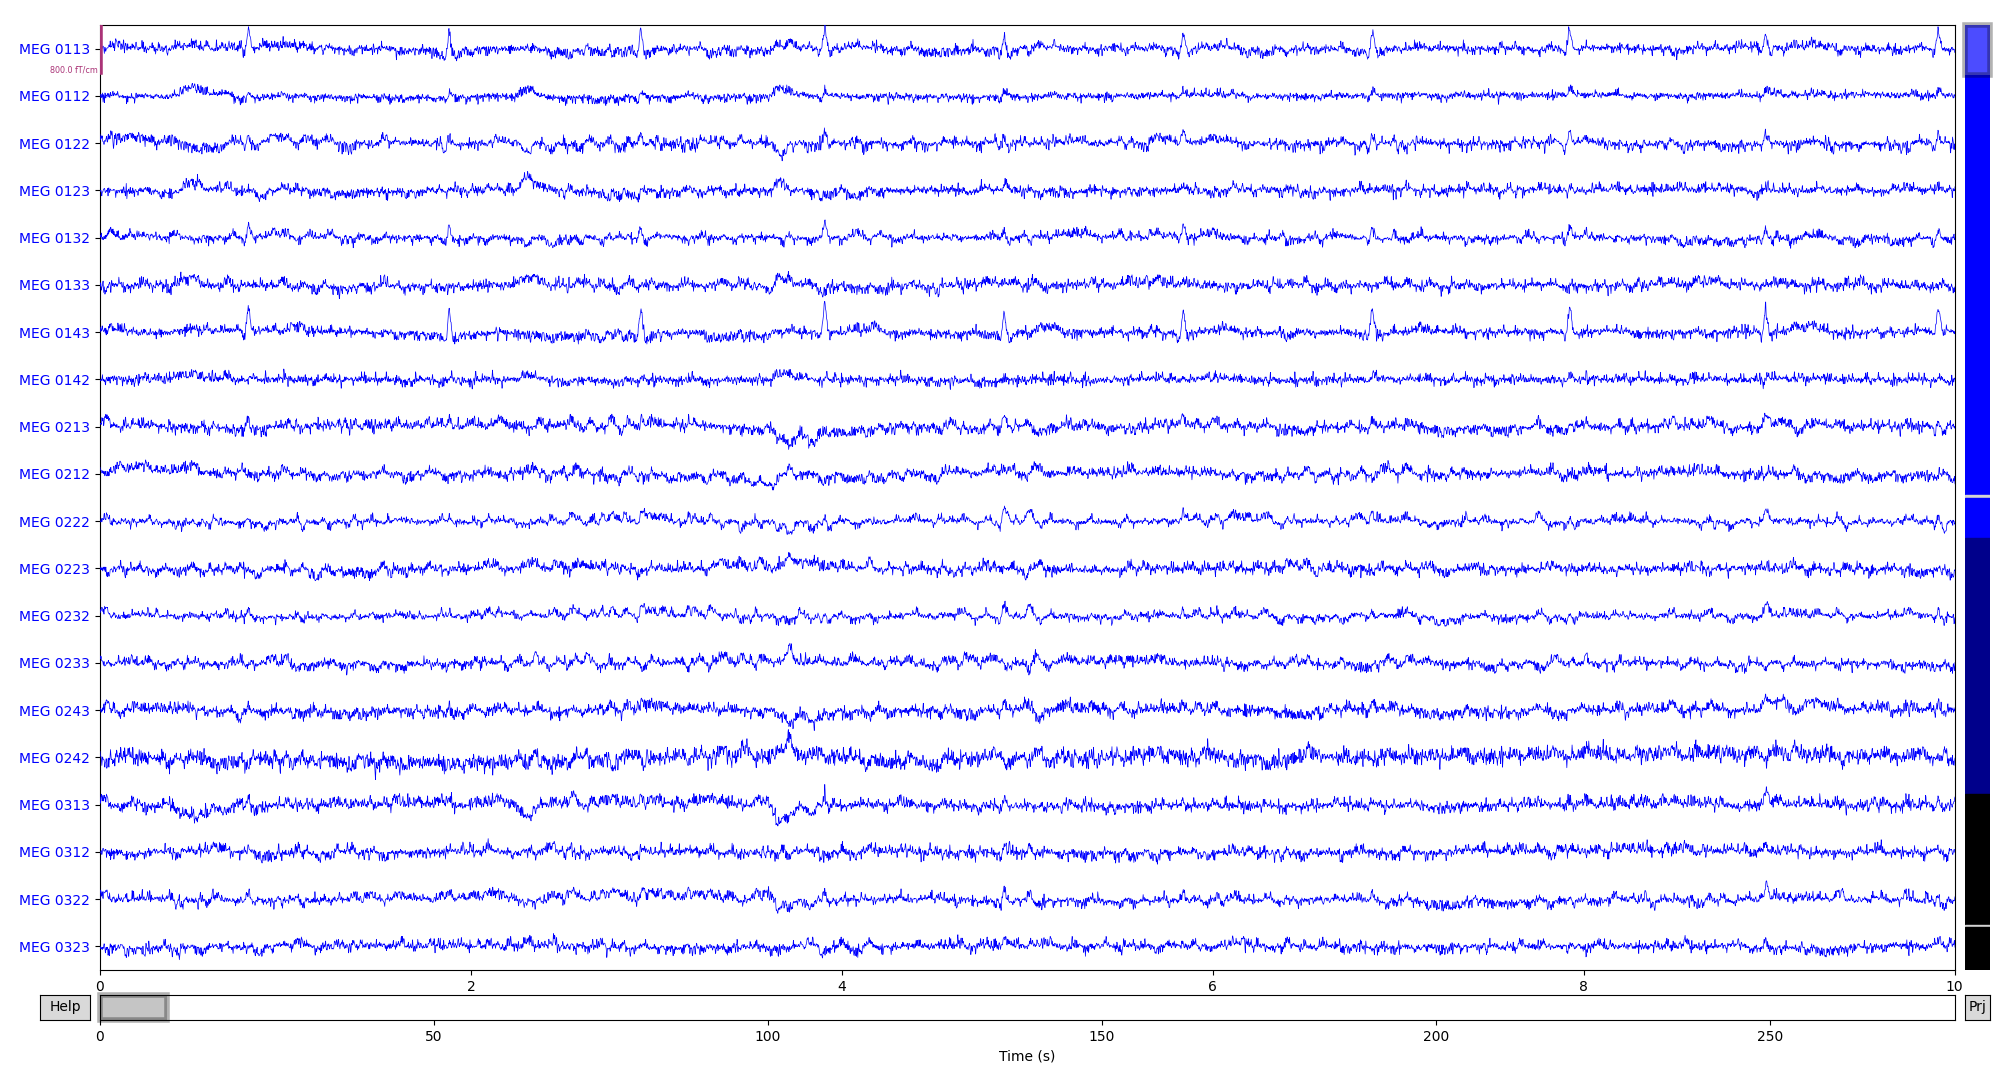

In [8]:
# simple plotting function
raw.plot();

<br/>
To display the corresponindg positions of the channels contained in the raw object use the <a href="https://mne.tools/stable/generated/mne.viz.plot_sensors.html" title="https://mne.tools/stable/generated/mne.viz.plot_sensors.html">.plot_sensors()</a> function.

<IPython.core.display.Javascript object>


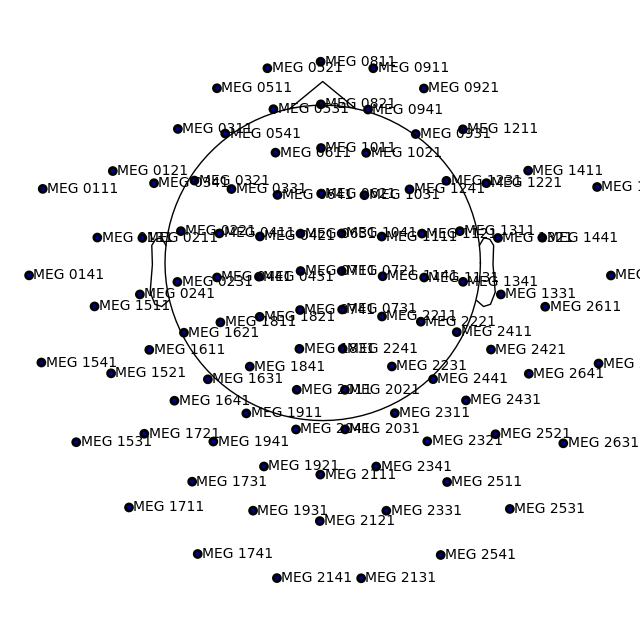

In [9]:
raw.plot_sensors(show_names=True);

<br/>

which looks a bit crowded. Consulting the "Good channels" attribute in the .info reveals that we have both MEG and EEG data in our raw object.

In [10]:
raw.info

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>

<br/>

With the ch_type parameter we can select which channels we want to plot. Conventional nomenclature would dictate that channels are named after their respective position on the skull (see <a href="https://en.wikipedia.org/wiki/10%E2%80%9320_system_(EEG)" title="https://en.wikipedia.org/wiki/10%E2%80%9320_system_(EEG)">International 10–20 system (Wikipedia)</a>), unfortunately for the sample data we've only a numbered list of EEG channels. You may further notice that channels markes as "bad" in the .info are displayed in red.

<IPython.core.display.Javascript object>


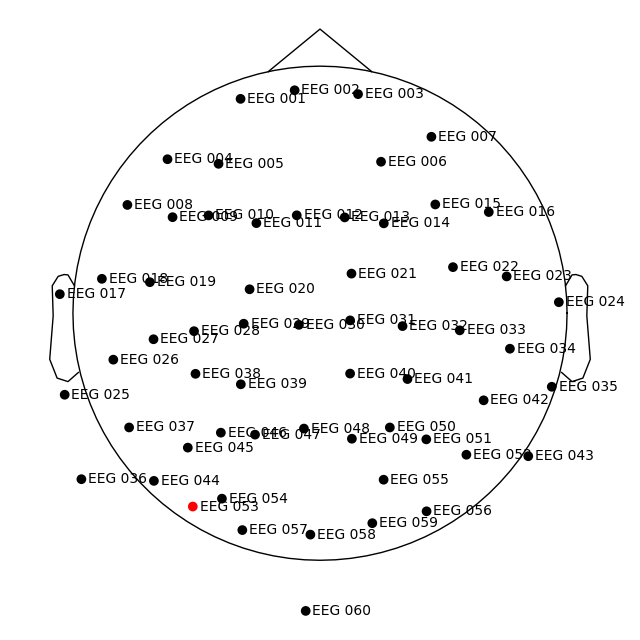

In [11]:
raw.plot_sensors(show_names=True, ch_type='eeg');

<br/>
Using the "kind" parameter we can further display our channel positions in 3d.

<IPython.core.display.Javascript object>


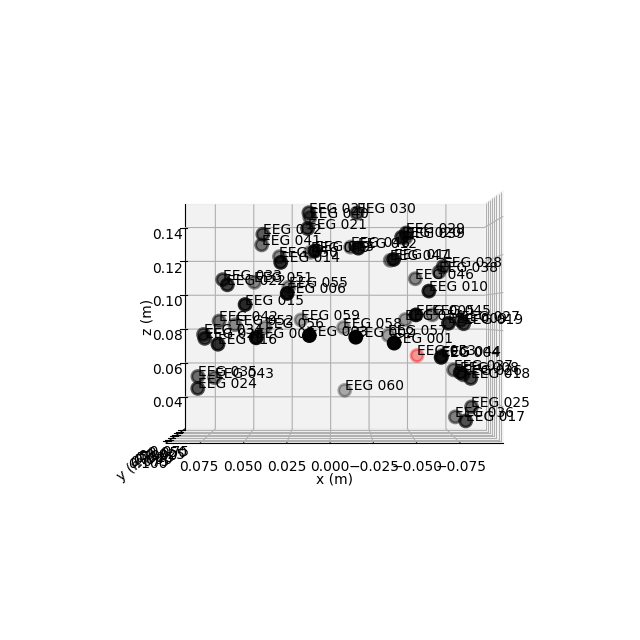

In [12]:
raw.plot_sensors(show_names=True, ch_type='eeg', kind='3d');

<br/>
There are multiple ways to access the data contained in the raw object. The tuple syntax shown below for example.

In [13]:
type(raw[:])

tuple

In [14]:
raw[:]

(array([[ 9.64355481e-12,  0.00000000e+00,  0.00000000e+00, ...,
         -1.92871096e-12,  2.89306644e-12,  3.85742192e-12],
        [-4.82177740e-12, -2.89306644e-12, -9.64355481e-13, ...,
         -9.64355481e-13, -9.64355481e-13, -1.92871096e-12],
        [ 1.01074222e-13,  6.31713890e-14,  7.58056668e-14, ...,
         -4.80102556e-13, -6.06445334e-13, -5.93811056e-13],
        ...,
        [ 3.88542173e-05,  4.07510373e-05,  4.09957883e-05, ...,
          6.72453304e-05,  6.68782039e-05,  6.91421504e-05],
        [ 6.58391126e-05,  6.80025648e-05,  6.81779798e-05, ...,
          8.51932390e-05,  8.58948991e-05,  8.89938982e-05],
        [ 2.85661012e-04,  2.83699953e-04,  2.80431520e-04, ...,
          2.64089357e-04,  2.62781984e-04,  2.57552492e-04]]),
 array([0.00000000e+00, 1.66496011e-03, 3.32992022e-03, ...,
        2.77710351e+02, 2.77712016e+02, 2.77713681e+02]))


<br/>
Accessing the raw data this way reveals that the data is organized into two numpy arrays, one containing the amplitude in each channel for each sample and the other the corresponding times, resulting in an (n_chans × n_samps) and an (1 × n_samps) matrix respectively.

raw[:][0] is the (n_chans × n_samps) matrix containing our EEG-amplitudes

In [15]:
print(type(raw[:][0]))

<class 'numpy.ndarray'>


In [16]:
raw[:][0]

array([[ 9.64355481e-12,  0.00000000e+00,  0.00000000e+00, ...,
        -1.92871096e-12,  2.89306644e-12,  3.85742192e-12],
       [-4.82177740e-12, -2.89306644e-12, -9.64355481e-13, ...,
        -9.64355481e-13, -9.64355481e-13, -1.92871096e-12],
       [ 1.01074222e-13,  6.31713890e-14,  7.58056668e-14, ...,
        -4.80102556e-13, -6.06445334e-13, -5.93811056e-13],
       ...,
       [ 3.88542173e-05,  4.07510373e-05,  4.09957883e-05, ...,
         6.72453304e-05,  6.68782039e-05,  6.91421504e-05],
       [ 6.58391126e-05,  6.80025648e-05,  6.81779798e-05, ...,
         8.51932390e-05,  8.58948991e-05,  8.89938982e-05],
       [ 2.85661012e-04,  2.83699953e-04,  2.80431520e-04, ...,
         2.64089357e-04,  2.62781984e-04,  2.57552492e-04]])

In [17]:
print(raw[:][0]) # 1 array containing (n_chans × n_samps)
print(raw[:][0].shape)

[[ 9.64355481e-12  0.00000000e+00  0.00000000e+00 ... -1.92871096e-12
   2.89306644e-12  3.85742192e-12]
 [-4.82177740e-12 -2.89306644e-12 -9.64355481e-13 ... -9.64355481e-13
  -9.64355481e-13 -1.92871096e-12]
 [ 1.01074222e-13  6.31713890e-14  7.58056668e-14 ... -4.80102556e-13
  -6.06445334e-13 -5.93811056e-13]
 ...
 [ 3.88542173e-05  4.07510373e-05  4.09957883e-05 ...  6.72453304e-05
   6.68782039e-05  6.91421504e-05]
 [ 6.58391126e-05  6.80025648e-05  6.81779798e-05 ...  8.51932390e-05
   8.58948991e-05  8.89938982e-05]
 [ 2.85661012e-04  2.83699953e-04  2.80431520e-04 ...  2.64089357e-04
   2.62781984e-04  2.57552492e-04]]
(376, 166800)


<br/>

therefore

In [18]:
raw[:][0].shape[:][0] == raw.info['nchan']

True

<br/>
and Raw[:][1] contains the corresponding time points

In [19]:
print(raw[:][1])  # 1 array containing times (1 × n_samps)
print(raw[:][1].shape) 

[0.00000000e+00 1.66496011e-03 3.32992022e-03 ... 2.77710351e+02
 2.77712016e+02 2.77713681e+02]
(166800,)


<br/>

**Although the above examples may be great for efficient programming pipelines, let's be more specific to see what we are actually dealing with.**

Let's check out the channels named in the info object again.

In [20]:
raw.info['ch_names']

['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143',
 'MEG 0142',
 'MEG 0141',
 'MEG 0213',
 'MEG 0212',
 'MEG 0211',
 'MEG 0222',
 'MEG 0223',
 'MEG 0221',
 'MEG 0232',
 'MEG 0233',
 'MEG 0231',
 'MEG 0243',
 'MEG 0242',
 'MEG 0241',
 'MEG 0313',
 'MEG 0312',
 'MEG 0311',
 'MEG 0322',
 'MEG 0323',
 'MEG 0321',
 'MEG 0333',
 'MEG 0332',
 'MEG 0331',
 'MEG 0343',
 'MEG 0342',
 'MEG 0341',
 'MEG 0413',
 'MEG 0412',
 'MEG 0411',
 'MEG 0422',
 'MEG 0423',
 'MEG 0421',
 'MEG 0432',
 'MEG 0433',
 'MEG 0431',
 'MEG 0443',
 'MEG 0442',
 'MEG 0441',
 'MEG 0513',
 'MEG 0512',
 'MEG 0511',
 'MEG 0523',
 'MEG 0522',
 'MEG 0521',
 'MEG 0532',
 'MEG 0533',
 'MEG 0531',
 'MEG 0542',
 'MEG 0543',
 'MEG 0541',
 'MEG 0613',
 'MEG 0612',
 'MEG 0611',
 'MEG 0622',
 'MEG 0623',
 'MEG 0621',
 'MEG 0633',
 'MEG 0632',
 'MEG 0631',
 'MEG 0642',
 'MEG 0643',
 'MEG 0641',
 'MEG 0713',
 'MEG 0712',
 'MEG 0711',
 'MEG 0723',
 'MEG 0722',

<br/>

using the ch_names list of our info object, we can access data explicitly by channel name

In [21]:
print(raw[['EEG 054'], :1000]) # access arrays for channel EEG 054 for the first 1000 samples

(array([[4.33922110e-05, 4.47882071e-05, 4.39738761e-05, 4.47300406e-05,
        4.42647086e-05, 4.15890494e-05, 4.19380485e-05, 4.62423697e-05,
        4.82200308e-05, 4.69403677e-05, 4.57770376e-05, 4.43228751e-05,
        4.40902091e-05, 4.52535391e-05, 4.56025381e-05, 4.64168692e-05,
        4.83945303e-05, 4.89761953e-05, 4.75220327e-05, 4.49627066e-05,
        4.29850455e-05, 4.22288810e-05, 4.28687125e-05, 4.56607046e-05,
        4.90343618e-05, 4.95578603e-05, 4.89761953e-05, 5.10120229e-05,
        5.20008534e-05, 4.93251943e-05, 4.91506948e-05, 4.92088613e-05,
        4.35667105e-05, 3.86225578e-05, 3.99022209e-05, 4.04257194e-05,
        3.77500603e-05, 3.62958977e-05, 3.50162346e-05, 3.37947381e-05,
        3.37365716e-05, 3.41437371e-05, 3.28640740e-05, 2.86179193e-05,
        2.60004267e-05, 2.73382563e-05, 2.88505854e-05, 2.87924188e-05,
        3.05374139e-05, 3.35620721e-05, 3.33875726e-05, 3.03047479e-05,
        2.88505854e-05, 3.08864129e-05, 3.58887322e-05, 3.96695

<br/>

or for multiple channels.

In [22]:
print(raw[['EEG 054', 'EEG 055'], 1000:2000])

(array([[4.68822012e-05, 4.50790396e-05, 4.54280386e-05, ...,
        4.27523795e-05, 3.99022209e-05, 3.66448967e-05],
       [6.31586928e-05, 6.23315444e-05, 6.17407241e-05, ...,
        5.53598645e-05, 5.30556653e-05, 5.00424816e-05]]), array([1.66496011, 1.66662507, 1.66829003, 1.66995499, 1.67161995,
       1.67328491, 1.67494987, 1.67661483, 1.67827979, 1.67994475,
       1.68160971, 1.68327467, 1.68493963, 1.68660459, 1.68826955,
       1.68993451, 1.69159947, 1.69326443, 1.69492939, 1.69659435,
       1.69825931, 1.69992427, 1.70158923, 1.70325419, 1.70491915,
       1.70658411, 1.70824907, 1.70991403, 1.71157899, 1.71324395,
       1.71490891, 1.71657387, 1.71823883, 1.71990379, 1.72156875,
       1.72323371, 1.72489867, 1.72656363, 1.72822859, 1.72989355,
       1.73155851, 1.73322347, 1.73488843, 1.73655339, 1.73821835,
       1.73988331, 1.74154827, 1.74321323, 1.74487819, 1.74654316,
       1.74820812, 1.74987308, 1.75153804, 1.753203  , 1.75486796,
       1.75653292, 1.758

<br/>

Referencing specific arrays containing our amplitudes corresponding to the respective channels can again be achieved via tuple indexing

In [23]:
print(raw[['EEG 054', 'EEG 055'], 1000:2000][0][0]) # access data in channel 'EEG 054' for sample 1000 to 2000

[4.68822012e-05 4.50790396e-05 4.54280386e-05 4.77546987e-05
 4.80455313e-05 4.66495352e-05 4.54862051e-05 4.72893667e-05
 5.11865224e-05 5.16518544e-05 5.00813588e-05 4.96160268e-05
 4.85690298e-05 4.60678702e-05 4.49627066e-05 4.51372061e-05
 4.68822012e-05 4.94415273e-05 5.03721914e-05 4.92670278e-05
 4.97323598e-05 5.13028554e-05 5.20008534e-05 5.31641835e-05
 5.32223500e-05 5.05466909e-05 4.89180288e-05 4.96741933e-05
 5.06048574e-05 5.10701894e-05 5.26406850e-05 5.48510121e-05
 5.49673451e-05 5.42111805e-05 5.43856800e-05 5.38621815e-05
 5.32223500e-05 5.27570180e-05 5.22916860e-05 5.13028554e-05
 5.26406850e-05 5.51418446e-05 5.54326771e-05 5.47928456e-05
 5.53163441e-05 5.58398426e-05 5.60725086e-05 5.57235096e-05
 5.57816761e-05 5.77011707e-05 6.03186633e-05 6.00278308e-05
 5.83410022e-05 5.99696643e-05 6.15401599e-05 5.81665027e-05
 5.36876820e-05 5.07793569e-05 4.90343618e-05 4.92088613e-05
 5.00231923e-05 5.08956899e-05 5.31060170e-05 5.25825185e-05
 4.76965322e-05 4.548620

which is the same as

In [24]:
print(raw[['EEG 054'], 1000:2000][0])

[[4.68822012e-05 4.50790396e-05 4.54280386e-05 4.77546987e-05
  4.80455313e-05 4.66495352e-05 4.54862051e-05 4.72893667e-05
  5.11865224e-05 5.16518544e-05 5.00813588e-05 4.96160268e-05
  4.85690298e-05 4.60678702e-05 4.49627066e-05 4.51372061e-05
  4.68822012e-05 4.94415273e-05 5.03721914e-05 4.92670278e-05
  4.97323598e-05 5.13028554e-05 5.20008534e-05 5.31641835e-05
  5.32223500e-05 5.05466909e-05 4.89180288e-05 4.96741933e-05
  5.06048574e-05 5.10701894e-05 5.26406850e-05 5.48510121e-05
  5.49673451e-05 5.42111805e-05 5.43856800e-05 5.38621815e-05
  5.32223500e-05 5.27570180e-05 5.22916860e-05 5.13028554e-05
  5.26406850e-05 5.51418446e-05 5.54326771e-05 5.47928456e-05
  5.53163441e-05 5.58398426e-05 5.60725086e-05 5.57235096e-05
  5.57816761e-05 5.77011707e-05 6.03186633e-05 6.00278308e-05
  5.83410022e-05 5.99696643e-05 6.15401599e-05 5.81665027e-05
  5.36876820e-05 5.07793569e-05 4.90343618e-05 4.92088613e-05
  5.00231923e-05 5.08956899e-05 5.31060170e-05 5.25825185e-05
  4.7696

In [25]:
# check if the the abpve example truly accesses the same data
print(raw[['EEG 054'], 1000:2000][0] == raw[['EEG 054', 'EEG 055'], 1000:2000][0][0])

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True 

<br/>

the same applies to our time samples

In [26]:
# let's take a look at how to access the corresponding time-samples
print('number of time samples')
print(' ')
print(raw[['EEG 054', 'EEG 055'], 1000:2000][1].shape)

print(' ')
print('-------------------------------------------------------')

print('time for sample in array')
print(' ')
print(raw[['EEG 054', 'EEG 055'], 1000:2000][1]) # access corresponding time points

number of time samples
 
(1000,)
 
-------------------------------------------------------
time for sample in array
 
[1.66496011 1.66662507 1.66829003 1.66995499 1.67161995 1.67328491
 1.67494987 1.67661483 1.67827979 1.67994475 1.68160971 1.68327467
 1.68493963 1.68660459 1.68826955 1.68993451 1.69159947 1.69326443
 1.69492939 1.69659435 1.69825931 1.69992427 1.70158923 1.70325419
 1.70491915 1.70658411 1.70824907 1.70991403 1.71157899 1.71324395
 1.71490891 1.71657387 1.71823883 1.71990379 1.72156875 1.72323371
 1.72489867 1.72656363 1.72822859 1.72989355 1.73155851 1.73322347
 1.73488843 1.73655339 1.73821835 1.73988331 1.74154827 1.74321323
 1.74487819 1.74654316 1.74820812 1.74987308 1.75153804 1.753203
 1.75486796 1.75653292 1.75819788 1.75986284 1.7615278  1.76319276
 1.76485772 1.76652268 1.76818764 1.7698526  1.77151756 1.77318252
 1.77484748 1.77651244 1.7781774  1.77984236 1.78150732 1.78317228
 1.78483724 1.7865022  1.78816716 1.78983212 1.79149708 1.79316204
 1.794827   1

<br/>

**We could instead further use the build_in <a href="https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.get_data">get_data() </a> function to access data, which returns our n_chan x n_samples matrix and if we set return_times=True the corresponding time-points.**

In [27]:
data, times = raw.get_data(return_times=True)
print(data.shape)

(376, 166800)


In [28]:
data # channels x samples

array([[ 9.64355481e-12,  0.00000000e+00,  0.00000000e+00, ...,
        -1.92871096e-12,  2.89306644e-12,  3.85742192e-12],
       [-4.82177740e-12, -2.89306644e-12, -9.64355481e-13, ...,
        -9.64355481e-13, -9.64355481e-13, -1.92871096e-12],
       [ 1.01074222e-13,  6.31713890e-14,  7.58056668e-14, ...,
        -4.80102556e-13, -6.06445334e-13, -5.93811056e-13],
       ...,
       [ 3.88542173e-05,  4.07510373e-05,  4.09957883e-05, ...,
         6.72453304e-05,  6.68782039e-05,  6.91421504e-05],
       [ 6.58391126e-05,  6.80025648e-05,  6.81779798e-05, ...,
         8.51932390e-05,  8.58948991e-05,  8.89938982e-05],
       [ 2.85661012e-04,  2.83699953e-04,  2.80431520e-04, ...,
         2.64089357e-04,  2.62781984e-04,  2.57552492e-04]])

In [29]:
times # 1 x samples

array([0.00000000e+00, 1.66496011e-03, 3.32992022e-03, ...,
       2.77710351e+02, 2.77712016e+02, 2.77713681e+02])


## Save/export Data

We can export our data in a number of ways for further analysis, that we'll explore in the following paragraphs.

### BIDS data format

It's advisable to adapt common standards for data organisation, so as to make collaboration, data and code sharing and automated analysis easier. For this we'll use the BIDS data structure, which specifices which file formats to use, file naming conventions and the structure of your data directories.

More info on the BIDS specification can be found <a href="https://bids-specification.readthedocs.io/en/stable/" title="https://bids-specification.readthedocs.io/en/stable/">here</a>.

Specific tutorials for working with MNE-BIDS can be found  <a href="https://mne.tools/mne-bids/stable/index.html" title="https://mne.tools/mne-bids/stable/index.html">here</a>, including <a href="https://mne.tools/mne-bids/stable/use.html" title="https://mne.tools/mne-bids/stable/use.html">tutorials</a> that should cover all of the possible use-cases.



**One of the most important things is to understand the <a href="https://mne.tools/mne-bids/stable/generated/mne_bids.BIDSPath.html" title="https://mne.tools/mne-bids/stable/generated/mne_bids.BIDSPath.html">BIDSPath object</a>**


The most important components are the root directory and our identifiers, i.e. the subject number, task name, session and run number. So we'll declare those in the next step.

In [30]:
homedir = os.path.expanduser("~")  # find home diretory
print(homedir)

root = homedir + (os.sep) +  "msc_05_example_bids_dataset"  # string denoting where your directory is supposed to be generated
subject = 'test'  # convention is a 3 numer identifier i.e 001
task = 'audiovisual'
session = '001'
run = '001'

/home/michael


 Let's set our path

In [31]:
bids_path = BIDSPath(root=root,  # set BIDSPath
                     subject=subject,
                     task=task,
                     session=session,
                     run=run)

In [32]:
bids_path

BIDSPath(
root: /home/michael/msc_05_example_bids_dataset
datatype: None
basename: sub-test_ses-001_task-audiovisual_run-001)

and use the <a href="https://mne.tools/mne-bids/stable/generated/mne_bids.write_raw_bids.html" title="https://mne.tools/mne-bids/stable/generated/mne_bids.write_raw_bids.html">write_raw_bids()</a> function to save raw data to a BIDS-compliant folder structure.

In [33]:
write_raw_bids(raw,
               bids_path=bids_path)

ValueError: The data is already loaded from disk and may be altered. See warning for "allow_preload".

<br/>

which will result in an error as we've loaded our data into memory. MNE-BIDS <a href="https://mne.tools/mne-bids/stable/generated/mne_bids.write_raw_bids.html" title="https://mne.tools/mne-bids/stable/generated/mne_bids.write_raw_bids.html">write_raw_bids()</a> provides a explicit warning for this case:

_"BIDS was originally designed for unprocessed or minimally processed data. For this reason, by default, we prevent writing of preloaded data that may have been modified. Only use this option when absolutely necessary: for example, manually converting from file formats not supported by MNE or writing preprocessed derivatives. Be aware that these use cases are not fully supported."_

So it's advisable to convert your data to the BIDS format beforehand. For this tutorial we'll just import our data again, without loading it into memory.

In [34]:
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=False)

Opening raw data file /home/michael/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


In [35]:
write_raw_bids(raw,
               bids_path=bids_path)

Opening raw data file /home/michael/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Writing '/home/michael/msc_05_example_bids_dataset/README'...
Writing '/home/michael/msc_05_example_bids_dataset/participants.tsv'...
Writing '/home/michael/msc_05_example_bids_dataset/participants.json'...
Writing '/home/michael/msc_05_example_bids_dataset/sub-test/ses-001/meg/sub-test_ses-001_coordsystem.json'...
Writing '/home/michael/msc_05_example_bids_dataset/sub-test/ses-001/meg/sub-test_ses-001_coordsystem.json'...
Writing '/home/michael/msc_05_example_bids_dataset/dataset_description.json'...
Writing '/home/michael/msc_05_example_bids_dataset/sub-test/ses-001/meg/sub-test_ses-001_task-audiovisual_run-001_meg.json'...
Writing '/home/michael/msc_05_example_bids_dataset/sub-test/ses-001/

/tmp/ipykernel_29088/2930231009.py:2: RuntimeWarning: No events found or provided. Please add annotations to the raw data, or provide the events_data and event_id parameters. For resting state data, BIDS recommends naming the task using labels beginning with "rest".
  bids_path=bids_path)


Closing /home/michael/msc_05_example_bids_dataset/sub-test/ses-001/meg/sub-test_ses-001_task-audiovisual_run-001_meg.fif
[done]
Writing '/home/michael/msc_05_example_bids_dataset/sub-test/ses-001/sub-test_ses-001_scans.tsv'...
Wrote /home/michael/msc_05_example_bids_dataset/sub-test/ses-001/sub-test_ses-001_scans.tsv entry with meg/sub-test_ses-001_task-audiovisual_run-001_meg.fif.


BIDSPath(
root: /home/michael/msc_05_example_bids_dataset
datatype: meg
basename: sub-test_ses-001_task-audiovisual_run-001_meg.fif)

<br/>
and let's generate an output path from that

In [36]:
output_path = os.path.join(str(bids_path.root) + (os.sep) + 'sub-test/ses-001/meg')
print(output_path)

/home/michael/msc_05_example_bids_dataset/sub-test/ses-001/meg


<br/>

**Now you could simply use the <a href="https://mne.tools/mne-bids/stable/generated/mne_bids.read_raw_bids.html" title="https://mne.tools/mne-bids/stable/generated/mne_bids.read_raw_bids.html">mne_bids.read_raw_bids()</a> function to import data simply by providing the bids_path.**

In [37]:
raw_bids = read_raw_bids(bids_path=bids_path)

Opening raw data file /home/michael/msc_05_example_bids_dataset/sub-test/ses-001/meg/sub-test_ses-001_task-audiovisual_run-001_meg.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading channel info from /home/michael/msc_05_example_bids_dataset/sub-test/ses-001/meg/sub-test_ses-001_task-audiovisual_run-001_channels.tsv.


/tmp/ipykernel_29088/3789182877.py:1: RuntimeWarning: Did not find any events.tsv associated with sub-test_ses-001_task-audiovisual_run-001.

The search_str was "/home/michael/msc_05_example_bids_dataset/sub-test/**/meg/sub-test_ses-001*events.tsv"
  raw_bids = read_raw_bids(bids_path=bids_path)
/tmp/ipykernel_29088/3789182877.py:1: RuntimeWarning: The unit for channel(s) STI 001, STI 002, STI 003, STI 004, STI 005, STI 006, STI 014, STI 015, STI 016 has changed from V to NA.
  raw_bids = read_raw_bids(bids_path=bids_path)


In [38]:
raw_bids.info

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: Anonymized using a time shift to preserve age at acquisition
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: mne_anonymize
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: mne_anonymize
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
 subject_info: 4 items (dict)
>

<br/>
An important aspect when you're planning on uploading or sharing data with others that we did not have time to adress in this tutorial is annonymization. Consult the <a href="https://mne.tools/mne-bids/stable/auto_examples/anonymize_dataset.html#sphx-glr-auto-examples-anonymize-dataset-py" title="https://mne.tools/mne-bids/stable/auto_examples/anonymize_dataset.html#sphx-glr-auto-examples-anonymize-dataset-py"> MNE-BIDS tutorial: Anonymizing a BIDS dataset </a> for more info.
    
More info on the BIDS structure will also be provided in the following sessions/chapters.

<br/>

### Saving Data using raw.save()

**Now that our directory structure is created we can directly save our raw data using the  <a href="https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.save" title="MNE API: mne.raw.save()"> raw.save() </a> function.**

This would mostly be used after manipulating the data in some way, but we can also select only a subset of channels or time-points. Let's say we're only interested in the contained eeg-channels (+eog-channels for artifact correction later on) for some 30 seconds.

In [39]:
# have to recur a few folder steps due to raw.save using the absolute path of the current notebook as self-reference
save_path = (('..' + str(os.sep) +
 '..' + str(os.sep) + 
 '..' + str(os.sep) + 
 '..' + str(os.sep) + 
 '..' + str(os.sep) + 
 '..' + str(os.sep) + 
 '..' + str(os.sep) + 
 '..' + str(os.sep) + '..') + output_path)


# save to fif
raw.save(fname=(save_path + str(os.sep) + 'sub-test_ses-001_eeg_data_cropped.fif'),  # the filename
         verbose='INFO',
         picks=['eeg', 'eog', 'stim'],  # the channels to pick (could also be single channels)
         tmin=30,  # first time-point in seconds included 
         tmax=60,  # last time-point included
         overwrite=True)  # checks if data is already present and overwrites if true

Writing /home/michael/gitkraken/Cog_Com_Neuro_ML_DL/lecture/introduction/notebooks/neuroscience/../../../../../../../../../home/michael/msc_05_example_bids_dataset/sub-test/ses-001/meg/sub-test_ses-001_eeg_data_cropped.fif
Closing /home/michael/gitkraken/Cog_Com_Neuro_ML_DL/lecture/introduction/notebooks/neuroscience/../../../../../../../../../home/michael/msc_05_example_bids_dataset/sub-test/ses-001/meg/sub-test_ses-001_eeg_data_cropped.fif
[done]


/tmp/ipykernel_29088/187358614.py:18: RuntimeWarning: This filename (/home/michael/gitkraken/Cog_Com_Neuro_ML_DL/lecture/introduction/notebooks/neuroscience/../../../../../../../../../home/michael/msc_05_example_bids_dataset/sub-test/ses-001/meg/sub-test_ses-001_eeg_data_cropped.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  overwrite=True)  # checks if data is already present and overwrites if true


<br/>

### Saving data as a csv/tsv using pandas

We can further export the data to a pandas DataFrame and save the created DataFrame as a tsv file, if you want the data in a more human readable format or want to do your statistics or plotting with another package.
For more info on how to specify the structure and composition of the DataFrame see <a href="https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.to_data_frame" title="MNE API: mne.raw.to_data_frame()"> raw.to_data_frame() </a>

In [40]:
raw_eeg_df = raw.to_data_frame(picks=['eeg', 'eog'],  # channels to include
                                 index='time',  # set time as index, if not included time will be a separte column
                                 start=30,  # first sample to include
                                 stop=60,  # first sample to include
                                 long_format=False)  # specify format

In [41]:
raw_eeg_df

channel,EEG 001,EEG 002,EEG 003,EEG 004,EEG 005,EEG 006,EEG 007,EEG 008,EEG 009,EEG 010,...,EEG 052,EEG 053,EEG 054,EEG 055,EEG 056,EEG 057,EEG 058,EEG 059,EEG 060,EOG 061
time,,,,,,,,,,,,,,,,,,,,,
50,2.056763e+08,3.278046e+08,3.167496e+10,1.841305e+09,5.918540e+08,2.018188e+10,3.195309e+08,6.275372e+08,3.995056e+09,4.373932e+08,...,4.578265e+08,5.495496e+08,4.915069e+10,6.629004e+08,3.542102e+08,5.540826e+10,7.475891e+08,4.301498e+08,6.952283e+10,2.784705e+09
52,9.974060e+07,2.443848e+08,2.865830e+10,1.855162e+09,5.613953e+08,2.096741e+10,3.507962e+08,6.557941e+08,2.581421e+09,4.729678e+08,...,4.449387e+08,5.308362e+08,4.920886e+10,6.504932e+08,3.470544e+08,5.529437e+10,7.532959e+08,4.252548e+08,7.016602e+10,2.837000e+09
53,-6.195068e+05,2.966690e+08,2.823596e+10,1.812435e+09,5.793122e+08,1.528748e+10,3.445432e+08,6.387222e+08,-3.810669e+09,4.642200e+08,...,3.682251e+08,5.058850e+08,4.356671e+10,5.884570e+08,2.802673e+08,5.005536e+10,7.019348e+08,3.640671e+08,6.542981e+10,2.863147e+09
55,-6.195068e+06,4.000626e+08,2.914096e+10,1.765089e+09,6.163404e+08,1.196411e+10,3.007718e+08,6.281259e+08,-7.682801e+09,4.175647e+08,...,3.215833e+08,5.027661e+08,3.862256e+10,5.459180e+08,2.319659e+08,4.618304e+10,6.557098e+08,3.187881e+08,6.168762e+10,2.869684e+09
57,2.230225e+07,4.182739e+08,2.938229e+10,1.761047e+09,6.276877e+08,1.419983e+10,2.301123e+08,6.440204e+08,-1.001837e+10,4.018185e+08,...,3.455179e+08,4.965283e+08,3.990222e+10,5.577344e+08,2.462775e+08,4.783447e+10,6.654114e+08,3.389801e+08,6.373413e+10,2.889294e+09
58,-1.858521e+06,3.654022e+08,2.932196e+10,1.744880e+09,5.882706e+08,1.601257e+10,1.957205e+08,6.381335e+08,-1.634900e+10,4.082336e+08,...,3.608606e+08,4.990234e+08,4.042572e+10,5.612793e+08,2.546259e+08,4.823309e+10,6.722595e+08,3.536652e+08,6.519592e+10,2.908905e+09
60,-6.628723e+07,3.278046e+08,3.046829e+10,1.699844e+09,5.351172e+08,1.498535e+10,2.032242e+08,6.251825e+08,-2.495374e+10,4.064841e+08,...,3.473590e+08,5.208557e+08,3.775006e+10,5.394190e+08,2.421033e+08,4.606915e+10,6.534271e+08,3.346970e+08,6.431885e+10,2.915442e+09
62,-1.164673e+08,3.272171e+08,3.034763e+10,1.646146e+09,5.183948e+08,1.577087e+10,1.975964e+08,6.263599e+08,-2.661322e+10,3.802405e+08,...,3.473590e+08,5.264697e+08,3.629590e+10,5.240576e+08,2.456812e+08,4.487329e+10,6.363068e+08,3.200119e+08,6.414343e+10,2.908905e+09
63,-1.189453e+08,3.272171e+08,2.865830e+10,1.583788e+09,5.309366e+08,1.710022e+10,1.757108e+08,5.757330e+08,-1.684070e+10,3.808237e+08,...,3.387671e+08,5.127466e+08,3.501623e+10,5.057422e+08,2.355438e+08,4.299408e+10,6.140503e+08,2.943130e+08,6.244776e+10,2.889294e+09


<br/>
For some analysis is preferable to have data organised in long format, i.e. so that everey sample for every channel is one row. This can be achieved by setting the long_format parameter to "True".

In [42]:
raw_eeg_df = raw.to_data_frame(picks=['eeg', 'eog', 'stim'],  # channels to include
                                 index='time',  # set time as index, if not included time will be a separte column
                                 start=30,  # first sample to include
                                 stop=60,  # first sample to include
                                 long_format=True)  # specify format



Converting "channel" to "category"...
Converting "ch_type" to "category"...


In [43]:
raw_eeg_df

,channel,ch_type,value
time,,,
50,STI 001,stim,0.000000e+00
50,STI 002,stim,0.000000e+00
50,STI 003,stim,0.000000e+00
50,STI 004,stim,0.000000e+00
50,STI 005,stim,0.000000e+00
...,...,...,...
98,EEG 057,eeg,5.301654e+10
98,EEG 058,eeg,7.104950e+08
98,EEG 059,eeg,3.805878e+08


<br/>

**To save our DataFrame, we can now simply use the pands fucntion <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html" title="pandas.DataFrame.to_csv()"> pd.DataFrame.to_csv() </a>**

In [44]:
fname = output_path + str(os.sep) + 'sub-test_ses-001_eeg_data_cropped.tsv'
raw_eeg_df.to_csv(fname, sep='\t')

## Further reading

For some more in-depth explanations on how to work with raw data, such as how to drop or rename channels, see <a href="https://mne.tools/stable/auto_tutorials/raw/10_raw_overview.html" title="MNE tutorials: The Raw data structure: continuous data"> MNE tutorials: The Raw data structure: continuous data </a>.

For an overview of the general workflow using MNE, see the <a href="https://mne.tools/stable/overview/cookbook.html" title="MNE cookbook">MNE cookbook</a>.